In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# sample data
sales_data = [
    ("Apple", 10, 2.5),
    ("Banana", 15, 1.2),
    ("Orange", 8, 3.0),
    ("Apple", 5, 2.5),
    ("Banana", 10, 1.2)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)

conn.commit()
conn.close()


  product  total_qty  revenue
0   Apple         15     37.5
1  Banana         25     30.0
2  Orange          8     24.0


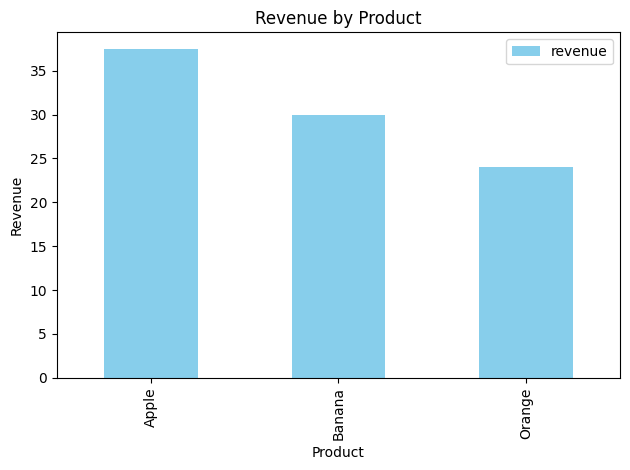

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Reconnect to database
conn = sqlite3.connect("sales_data.db")

# SQL Query to get total quantity and revenue by product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(df)

#Plot
df.plot(kind="bar", x="product", y="revenue", color="skyblue")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
